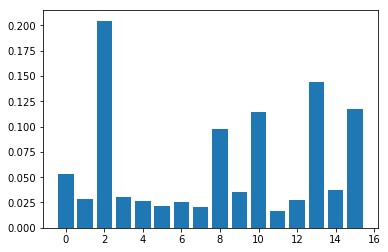

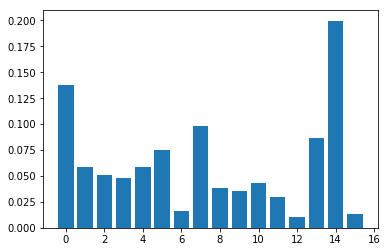

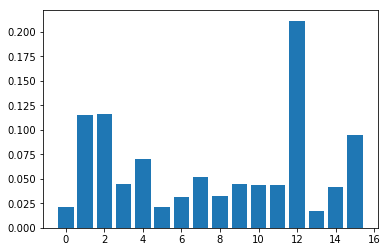

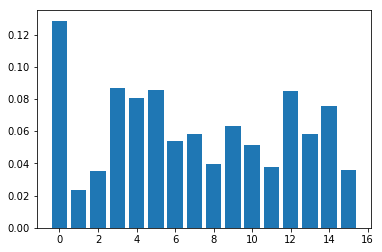

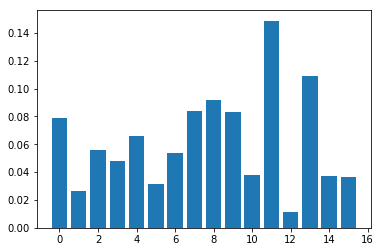

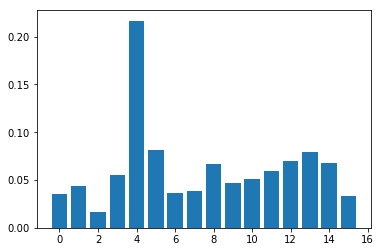

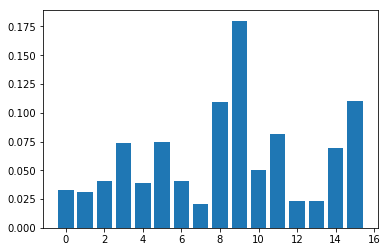

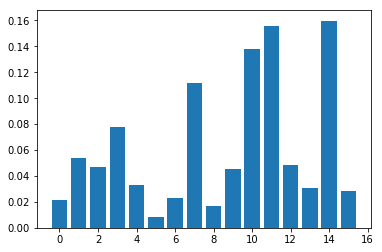

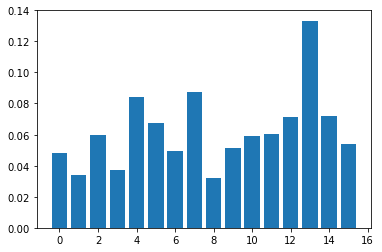

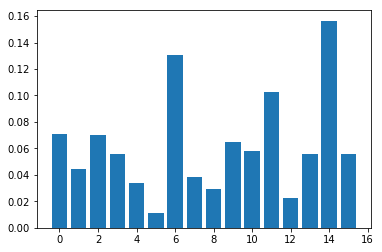

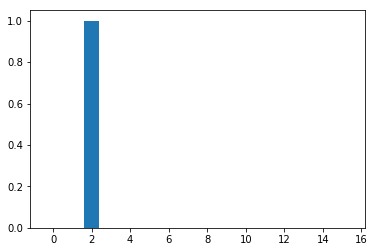

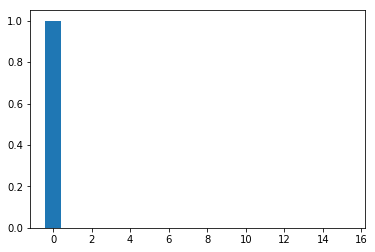

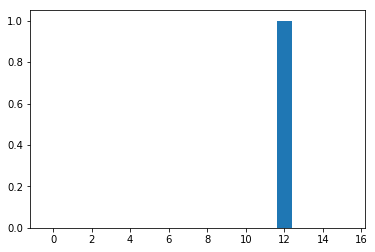

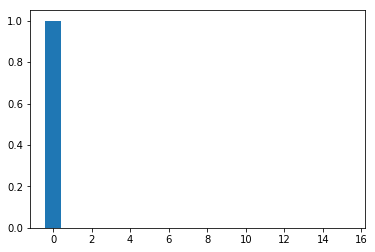

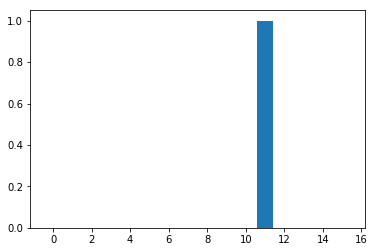

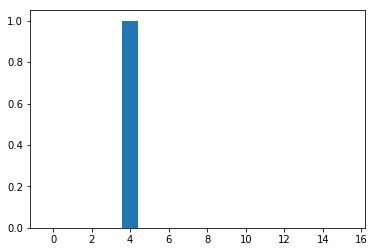

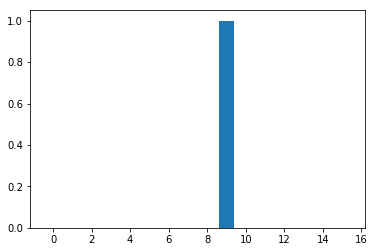

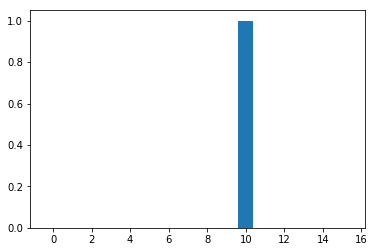

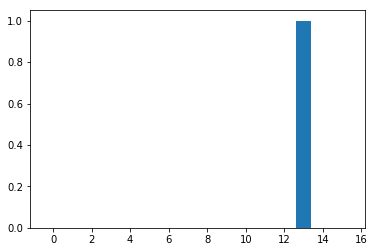

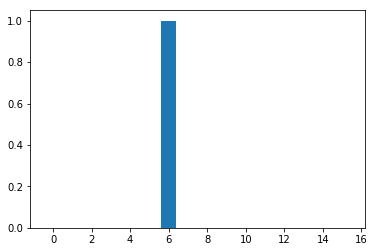

<Figure size 432x288 with 0 Axes>

In [118]:
import torch
import  torch.nn.functional as F
import pandas as pd
from dataset import  Dataset
from torchvision import transforms
import  numpy  as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def _sample_gumbel(shape, eps=1e-20, device=None):
    u = torch.rand(shape)
    if device:
        u = u.to(device)
    return -torch.log(-torch.log(u + eps) + eps)

def _gumbel_softmax_sample(logits, temperature):
    y = logits + _sample_gumbel(logits.size(), device=logits.device)
    return F.softmax(y / temperature, dim=-1)

def gumbel_softmax(logits, temperature):
    y = _gumbel_softmax_sample(logits, temperature)
    return y

def entropy(logits, targets):
#         logits = F.log_softmax(logits, dim=-1)
        return -torch.mean(torch.sum(targets * logits, dim=-1))

class Model(torch.nn.Module):
    
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.x_dim  = x_dim
        self.y_dim  = y_dim
        self.py = torch.nn.Linear(x_dim, y_dim)
        self.softmax = torch.nn.Softmax(dim=-1)
    
    def forward(self, x, temperature=6.):
        # probability x_i contains in each classes given from network
        logits = self.py(x).view(-1, self.y_dim)
        prob = self.softmax(logits)
        y = gumbel_softmax(logits, temperature)
        return logits, prob, y

y_dim = 16
x_dim = 64   
x = torch.Tensor([np.random.randn(x_dim) for _ in range(10)])
net = Model(x_dim, y_dim)

optimizer = torch.optim.Adam(net.parameters(), lr=0.3)

net.train()
for e in range(100):
    optimizer.zero_grad()
    logits, prob, y = net.forward(x)
    loss = entropy(logits, prob)/10
    loss.backward()
    optimizer.step()
    
    if e in (0, 99):
        with torch.no_grad():
            logits, prob, y = (x.detach().numpy() for x in [logits, prob, y])
            xx = np.arange(y_dim)
            for logit in prob:
                plt.bar(xx, logit)
                plt.show()
                plt.clf()

#     plt.bar(xx, prob[0])
#     plt.show()
#     plt.clf()

#     plt.bar(xx, y[0])
#     plt.show()
#     plt.clf()


In [109]:
json = df.to_json('a.json')

NameError: name 'df' is not defined

In [63]:
df.columns.to_numpy(dtype=str)

array(['s', 'd', 'f'], dtype='<U1')

In [64]:
df.loc[:, 's'].unique().astype(str)

array(['a'], dtype='<U1')

a[1]

In [65]:
len(df)

4

In [66]:
(a, b, c) = df.iloc[0,:]
(a, b, c)

('a', 'b', 'c')

In [67]:
item['s']

'a'

In [69]:
from dataset import Dataset

In [70]:
dataset  = Dataset(df)

In [71]:
dataset.get_labels()

['a']

In [72]:
dataset